In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


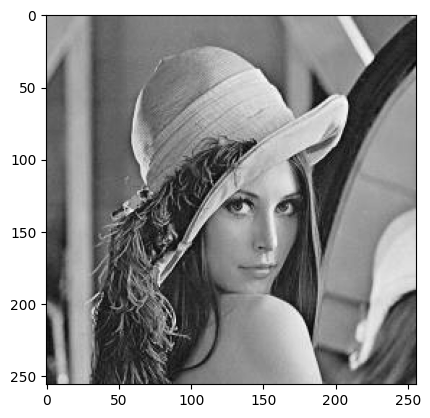

In [3]:
img = cv2.imread('/content/gdrive/My Drive/colab/Images/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

glmg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(glmg.shape)
plt.imshow(glmg, cmap='gray')

In [11]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = int)

In [12]:
x = cv2.filter2D(glmg, -1, gx)
y = cv2.filter2D(glmg, -1, gy)

In [13]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

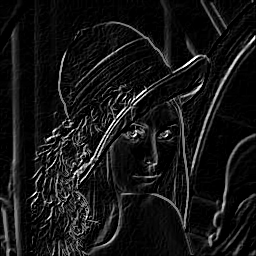

In [14]:
cv2_imshow(outimg)

In [30]:
gBin = np.zeros((glmg.shape[0], glmg.shape[1]), dtype = np.ubyte)

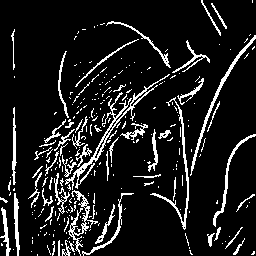

In [31]:
threshold = 60

for h in range(glmg.shape[0]):
  for w in range(glmg.shape[1]):
    if (outimg[h, w] > threshold):
      gBin[h, w] = 255

cv2_imshow(gBin)

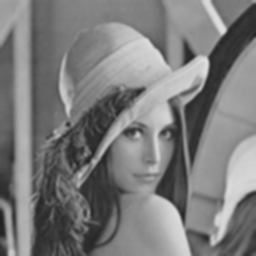

In [32]:
blurimg = cv2.GaussianBlur(glmg, (5, 5), 1.4)
cv2_imshow(blurimg)


In [33]:
x = cv2.filter2D(blurimg, -1, gx)
y = cv2.filter2D(blurimg, -1, gy)

In [ ]:
cannyDirection = np.arctan2(y,x)